In [60]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error as mse
from statistics import stdev 
from statistics import mean

from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense



In [61]:
    
def generate_next_data (current_time , x): # x is a 2d array. size of x: 1 row * (number of data points) col
    next_data = x[0][current_time] + ( ( 0.2 * x[0][current_time -25] )  /  (1+ (x[0][current_time -25])**10 )  ) -0.1* x[0][current_time]
    return next_data

def generate_input (t, x): # x: a 2D array. x stores Mackey Glass data
    l=[x[0][t-20],
      x[0][t-15],
      x[0][t-10],
      x[0][t-5],
      x[0][t]]
    return l

def generate_output (t, data_target_1531):
    return data_target_1531[0][t+5]


def generate_Mackey_Galss_Data( how_many_data_point):
    data_target_1531=np.zeros((1, how_many_data_point)) # 1 row * 1531 col
    data_target_1531[0][25]=1.5
    for i in range (25, 1530):
        data_target_1531[0][i+1] = generate_next_data (i, data_target_1531)
    # print( data_target_1531.shape)
    return data_target_1531


# add gaussian noise to my pure data
def add_noise (data_target_1531, noise_std_dev): 
    noise_mean=0
    noise = np.random.normal(noise_mean, noise_std_dev, data_target_1531.shape)  # np.random.normal(mu, sigma, 1000)
    data_target_1531_noise = data_target_1531 + noise
    return data_target_1531_noise

def generate_inputArray_outputArray (data_target_1531):
    inputData = []
    outputData = []
    for j in range(301, 1501):
        i =j+25
        inputData.append (generate_input (i, data_target_1531) )
        outputData.append (generate_output (i, data_target_1531) )

    inputData = np.array(inputData, dtype=float) # convert list to array
    outputData = np.array(outputData, dtype=float)

    return inputData, outputData


# split to train, validation, and test data
#split_1: split between train and val. 
#split_2: split between val and test. 
def split (inputData, outputData): 
    
    train_input,  val_input,  test_input  =  inputData[:split_1 , :], inputData[ split_1:split_2 , :], inputData[split_2:, :]
    train_output, val_output, test_output =  outputData[:split_1],    outputData[ split_1:split_2 ],    outputData[split_2:]

    return train_input, val_input, test_input, train_output, val_output, test_output

def generate_6_DataSet (data_target_1531 ): # standard deviation: choose std_1 or std_2 or std_3
  
    inputData, outputData = generate_inputArray_outputArray (data_target_1531 )
    train_in, val_in, test_in, train_out, val_out, test_out       = split (inputData, outputData)
    return train_in, val_in, test_in, train_out, val_out, test_out

##############################
def draw ( l, color):
    index_list= range( len (l))
    plt.scatter (index_list, l, c=color)
    plt.show()

    
def draw_2_scatters ( l1, label1, color1, l2, label2, color2):
    index_list= range( len (l1))
    p1=plt.scatter (index_list, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (index_list, l2, c=color2, s=10)
    
    plt.legend( (p1,p2), (label1, label2), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
    plt.show()
    
def draw_3_scatters ( l1, color1, l2, color2, l3, color3):
    index_list= range( len (l1))
    p1=plt.scatter (index_list, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (index_list, l2, c=color2, s=10)
    p3=plt.scatter (index_list, l3, c=color3, s=10)
    
    plt.legend( (p1,p2,p3), ('pure data', 'noised data', 'prediction'), scatterpoints=1, loc='lower left',  ncol=1, fontsize=10)
    plt.show()


def draw_1_line ( title, xlabel, ylabel, ymin,ymax, l0, l1, color1, label1 ):
    
    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label= label1 )
    ax.set_ylim([ymin,ymax])
    plt.title( title )
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel ) 
    ax.legend()
#     plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()
    
def draw_2_line ( title,xlabel, ylabel, l0, l1, color1, label1, l2, color2, label2 ):
    
    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label= label1 )
    ax.plot(l0, l2, c=color2, label= label2)
    plt.title(title)
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel ) 
    ax.legend()
#     plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()
        
def draw_3_line ( title,xlabel, ylabel, ymin,ymax, l0, l1, color1, label1, l2, color2, label2, l3, color3, label3 ):

    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label= label1 )
    ax.plot(l0, l2, c=color2, label= label2 )
    ax.plot(l0, l3, c=color3, label= label3 )
    ax.set_ylim([ymin,ymax])
    plt.title(title)
    ax.legend()
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel ) 
#     plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()    

## generate data set

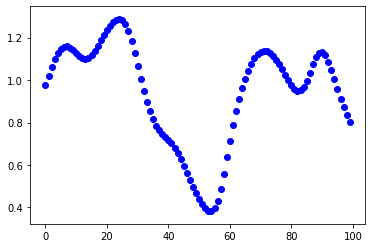

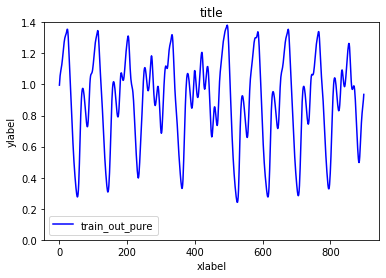

In [66]:

data_target_1531 = generate_Mackey_Galss_Data(1531)

std_1=0.03
std_2=0.09
std_3=0.18


data_target_1531_noise1 = add_noise (data_target_1531, std_1 )
data_target_1531_noise2 = add_noise (data_target_1531, std_2 )
data_target_1531_noise3 = add_noise (data_target_1531, std_3 )

split_1 = 900
split_2 = 1000


train_in_pure,  val_in_pure,  test_in_pure,  train_out_pure,  val_out_pure,  test_out_pure = generate_6_DataSet (data_target_1531 )

train_in_noise1, val_in_noise1, test_in_noise1, train_out_noise1, val_out_noise1, test_out_noise1 = generate_6_DataSet (data_target_1531_noise1 )
train_in_noise2, val_in_noise2, test_in_noise2, train_out_noise2, val_out_noise2, test_out_noise2 = generate_6_DataSet (data_target_1531_noise2 )
train_in_noise3, val_in_noise3, test_in_noise3, train_out_noise3, val_out_noise3, test_out_noise3 = generate_6_DataSet (data_target_1531_noise3 )

draw ( val_out_pure, 'b')
draw_1_line ( 'title', 'xlabel', 'ylabel', 0,1.4, np.arange(len(train_out_pure) ), train_out_pure, 'b', 'train_out_pure' )
# draw ( train_out_noise1, 'b')
# draw ( train_out_noise2, 'b')
# # draw_1_line ( 'title', 'xlabel', 'ylabel', 0,1.5, np.arange(len(train_out_noise2) ), train_out_noise2, 'b', 'train_out_noise2' )
# draw ( train_out_noise3, 'b')

## Two Layers

In [12]:
def train_2_layer_NN (train_input, train_output, val_input, val_output, 
                      learning_rate, regu_strength, num_neurons_layer1): 
    dim_InputData =5
    num_neurons_output=1
    
    model = Sequential()  
    model.add(Dense( num_neurons_layer1, 
                     input_shape=(dim_InputData,),
                     activation='sigmoid',
                     kernel_regularizer=regularizers.l1(regu_strength),  
                   ) )  
    model.add(Dense(num_neurons_output))

    model.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate)  )

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)  # 
    
    history=model.fit(train_input, train_output, 
                      validation_data=(val_input, val_output), #validation_split=0.1, 
                      nb_epoch=100, 
                      batch_size=1, 
                      verbose=1,
                      callbacks = [es]
                     )

    return model, history

def predict (kerasModel, test_data  ):
    prediction = kerasModel.predict(test_data)
    return prediction


In [71]:
learning_rate=0.01
regu_strength_list=[0.0001] #[0.0001, 0.0002, 0.0003, 0.0004, 0.0005,....]
num_neurons_layer1 =3
i=0
model_pure, model_history = train_2_layer_NN(train_in_pure, train_out_pure, val_in_pure, val_out_pure, learning_rate, regu_strength_list[i], num_neurons_layer1)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 887us/step - loss: 0.0280 - val_loss: 0.0229
Epoch 2/100
900/900 [==============================] - 1s 795us/step - loss: 0.0180 - val_loss: 0.0130
Epoch 3/100
900/900 [==============================] - 1s 778us/step - loss: 0.0155 - val_loss: 0.0118
Epoch 4/100
900/900 [==============================] - 1s 792us/step - loss: 0.0151 - val_loss: 0.0111
Epoch 5/100
900/900 [==============================] - 1s 816us/step - loss: 0.0143 - val_loss: 0.0124
Epoch 00005: early stopping


[[0.7725158 ]
 [0.7195588 ]
 [0.6814637 ]
 [0.65928096]
 [0.65304196]
 [0.66182166]
 [0.68370277]
 [0.7157961 ]
 [0.7545672 ]
 [0.79647416]
 [0.838383  ]
 [0.87754506]
 [0.9115472 ]
 [0.93825704]
 [0.95533067]
 [0.95946836]
 [0.94655204]
 [0.91387093]
 [0.86356264]
 [0.80355746]
 [0.74504334]
 [0.69949776]
 [0.6764229 ]
 [0.6814573 ]
 [0.715737  ]
 [0.7760075 ]
 [0.8542807 ]
 [0.9387016 ]
 [1.0169295 ]
 [1.0798752 ]
 [1.1233635 ]
 [1.1477231 ]
 [1.1564728 ]
 [1.1548305 ]
 [1.1482456 ]
 [1.1411996 ]
 [1.1364697 ]
 [1.1346284 ]
 [1.133962  ]
 [1.1316115 ]
 [1.1256503 ]
 [1.1167012 ]
 [1.1083608 ]
 [1.1059849 ]
 [1.1134759 ]
 [1.13012   ]
 [1.1509645 ]
 [1.1701763 ]
 [1.183892  ]
 [1.191336  ]
 [1.1944319 ]
 [1.1956367 ]
 [1.1946882 ]
 [1.1867235 ]
 [1.1641679 ]
 [1.121437  ]
 [1.0581694 ]
 [0.9793525 ]
 [0.8939001 ]
 [0.8117185 ]
 [0.7395685 ]
 [0.6790814 ]
 [0.6284482 ]
 [0.5852408 ]
 [0.5481947 ]
 [0.5175321 ]
 [0.49408877]
 [0.4778961 ]
 [0.4670914 ]
 [0.45799208]
 [0.44660598]
 [0.43

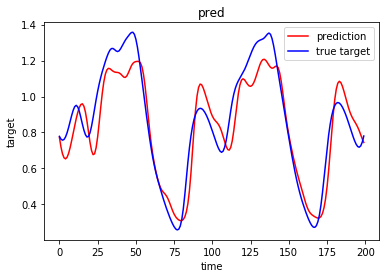

In [72]:
prediction = predict (model_pure, test_in_pure)
print (prediction)

draw_2_line ( 'pred','time', 'target', np.arange(len(prediction) ), prediction, 'r','prediction', test_out_pure, 'b', 'true target')

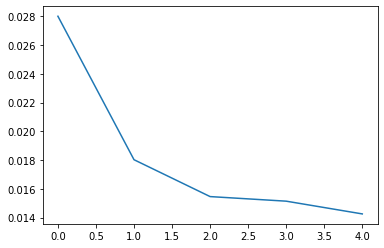

In [73]:
plt.plot (model_history.history['loss'])
plt.show ()

In [75]:
# print("history: ",model_history.history )

val_MSE = model_history.history['val_loss'][-2]
print ("validation MSE  ",val_MSE) 

train_MSE = model_history.history['loss'][-2]
print ("train MSE  ",train_MSE)

prediction = predict (model_pure, test_in_pure)
MSE= mse (test_out_pure, prediction) 
print ("prediction MSE  ",MSE)

validation MSE   0.011126679120352492
train MSE   0.01514058785034447
prediction MSE   0.01347698101149785


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 862us/step - loss: 0.0429 - val_loss: 0.0169
Epoch 2/100
900/900 [==============================] - 1s 772us/step - loss: 0.0195 - val_loss: 0.0129
Epoch 3/100
900/900 [==============================] - 1s 775us/step - loss: 0.0149 - val_loss: 0.0118
Epoch 4/100
900/900 [==============================] - 1s 800us/step - loss: 0.0107 - val_loss: 0.0127
Epoch 00004: early stopping
weight[1] [ 0.31944758  0.4039693  -0.12290002]
weight[3] [0.21493307]
v [[-1.0591178  -1.8892521   0.11738839]
 [-0.1927298  -1.9806197   0.01966378]
 [-0.35952416 -0.04135641  0.7242014 ]
 [-0.49749187  0.5136662   0.3850595 ]
 [ 2.2644446   0.0424769  -1.9680558 ]]
w [[ 1.6200665 ]
 [-1.2336992 ]
 [-0.72544163]]
concat_weights [-1.0591178  -1.8892521   0.11738839 -0.1927298  -1.9806197   0.01966378
 -0.35952416 -0.04135641  0.7242014  -0.49749187  0.5136662   0.3850595
  2.2644446   0.0424769  -1.9680558  

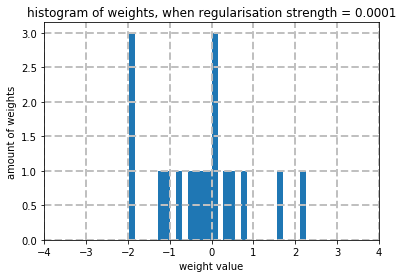

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 885us/step - loss: 0.0424 - val_loss: 0.0249
Epoch 2/100
900/900 [==============================] - 1s 867us/step - loss: 0.0263 - val_loss: 0.0203
Epoch 3/100
900/900 [==============================] - 1s 818us/step - loss: 0.0250 - val_loss: 0.0210
Epoch 00003: early stopping
weight[1] [-0.1299573  -0.14956152 -0.13244608]
weight[3] [0.14438148]
v [[-2.8728191e-03 -1.4055573e-03  6.4832968e-01]
 [ 1.1898446e-02  1.4311023e-01  1.5110867e-03]
 [ 1.3143500e-02 -8.3333176e-01 -5.4923160e-04]
 [-1.0754990e-01 -1.2357150e-01  1.7217691e-01]
 [ 1.0689485e+00  1.5779760e+00 -1.7047595e+00]]
w [[ 0.7697802]
 [ 0.9997338]
 [-1.1906576]]
concat_weights [-2.8728191e-03 -1.4055573e-03  6.4832968e-01  1.1898446e-02
  1.4311023e-01  1.5110867e-03  1.3143500e-02 -8.3333176e-01
 -5.4923160e-04 -1.0754990e-01 -1.2357150e-01  1.7217691e-01
  1.0689485e+00  1.5779760e+00 -1.7047595e+00  7.6978022e-01

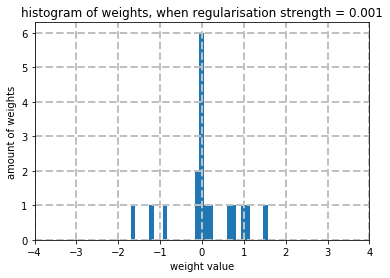

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 954us/step - loss: 0.1537 - val_loss: 0.0650
Epoch 2/100
900/900 [==============================] - 1s 890us/step - loss: 0.0577 - val_loss: 0.0542
Epoch 3/100
900/900 [==============================] - 1s 871us/step - loss: 0.0499 - val_loss: 0.0416
Epoch 4/100
900/900 [==============================] - 1s 893us/step - loss: 0.0464 - val_loss: 0.0403
Epoch 5/100
900/900 [==============================] - 1s 798us/step - loss: 0.0429 - val_loss: 0.0380
Epoch 6/100
900/900 [==============================] - 1s 792us/step - loss: 0.0394 - val_loss: 0.0405
Epoch 00006: early stopping
weight[1] [-0.00987037 -0.8574952   0.3192333 ]
weight[3] [1.0903457]
v [[-5.7627149e-03 -4.5606373e-03  2.2894152e-01]
 [-2.7612583e-03 -1.5820609e-04  4.6966597e-02]
 [-4.5488430e-03 -2.3179026e-03  7.4519984e-02]
 [-5.4106265e-03  6.1416980e-03  2.3872431e-02]
 [ 3.4511485e-04  3.9060200e-03 -1.2215742e+

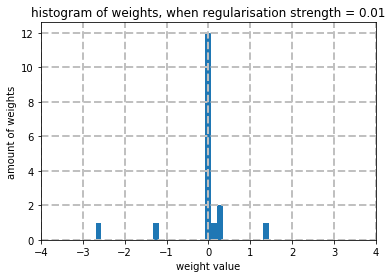

In [76]:
def weight_histogram(train_in_pure, train_out_pure, val_in_pure, val_out_pure, learning_rate):
    regu_strengths = [ 0.0001,  0.001, 0.01  ]
    num_neurons_layer1 =3
    weights_of_model = []
    
    for i in range(len(regu_strengths)):
        
        model_pure, model_history = train_2_layer_NN(train_in_pure, train_out_pure, val_in_pure, val_out_pure, learning_rate, regu_strengths[i], num_neurons_layer1)
        weights = model_pure.get_weights()
        print ('weight[1]',weights[1])
        print ('weight[3]',weights[3])
        v, w = weights[0], weights[2]
        print ("v", v)
        print ("w", w)
        
        concat_weights = np.concatenate((v.flatten(), w.flatten()))
        print ("concat_weights",concat_weights)
        weights_of_model.append (concat_weights)
        
        plt.hist(concat_weights, bins= 30 ) 
        plt.title('histogram of weights, when regularisation strength = ' + str(regu_strengths[i]))
        plt.xlim (-4 ,4 )
        plt.xlabel('weight value')
        plt.ylabel('amount of weights')
        plt.grid(color='silver', linestyle='--', linewidth=2)
        plt.show()
    return regu_strengths, weights_of_model

regu_strengths, weights_of_model = weight_histogram(train_in_pure, train_out_pure, val_in_pure, val_out_pure, learning_rate)

In [49]:

def num_neurons_validation_2lay (train_in_pure, train_out_pure, val_in_pure, val_out_pure, test_in_pure, test_out_pure,
                            learning_rate, regu_strength, num_neurons_layer1_list):
    val_MSE_list= []
    test_mse_list =[]
    train_MSE_list =[]
    time_2lay =[]
    
    for i in range (0, len (num_neurons_layer1_list) ):
        start_time = time.time()

        model_pure, model_history = train_2_layer_NN(train_in_pure, train_out_pure, val_in_pure, val_out_pure, 
                                                     learning_rate, regu_strength, num_neurons_layer1_list[i])
        end_time = time.time()
        time_spent= end_time - start_time    
        time_2lay.append(time_spent)
        
        val_MSE = model_history.history['val_loss'][-1]
        val_MSE_list.append (val_MSE)
        
        train_MSE = model_history.history['loss'][-1]
        train_MSE_list.append (train_MSE)  
        
        prediction = predict (model_pure, test_in_pure)
        MSE= mse (test_out_pure, prediction) 
        test_mse_list.append (MSE)
        
    return val_MSE_list, test_mse_list , train_MSE_list, time_2lay


learning_rate = 0.001
num_neurons_layer1 =[1,2,3]
regu_strength = 0.0001
valMSE_of_NumNeurons_2lay, testMSE_of_NumNeurons_2lay, trainMSE_of_NumNeurons_2lay, time_2lay = num_neurons_validation_2lay (train_in_pure, train_out_pure, val_in_pure, val_out_pure, test_in_pure, test_out_pure,
                                                                                                         learning_rate, regu_strength, num_neurons_layer1)
print (valMSE_of_NumNeurons_2lay, testMSE_of_NumNeurons_2lay , trainMSE_of_NumNeurons_2lay, time_2lay)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 910us/step - loss: 0.1030 - val_loss: 0.0597
Epoch 2/100
900/900 [==============================] - 1s 799us/step - loss: 0.0706 - val_loss: 0.0539
Epoch 3/100
900/900 [==============================] - 1s 830us/step - loss: 0.0612 - val_loss: 0.0432
Epoch 4/100
900/900 [==============================] - 1s 759us/step - loss: 0.0527 - val_loss: 0.0365
Epoch 5/100
900/900 [==============================] - 1s 777us/step - loss: 0.0463 - val_loss: 0.0321
Epoch 6/100
900/900 [==============================] - 1s 802us/step - loss: 0.0408 - val_loss: 0.0288
Epoch 7/100
900/900 [==============================] - 1s 791us/step - loss: 0.0366 - val_loss: 0.0260
Epoch 8/100
900/900 [==============================] - 1s 822us/step - loss: 0.0336 - val_loss: 0.0232
Epoch 9/100
900/900 [==============================] - 1s 864us/step - loss: 0.0313 - val_loss: 0.0228
Epoch 10/100
900/900 [=====

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 874us/step - loss: 0.0524 - val_loss: 0.0306
Epoch 2/100
900/900 [==============================] - 1s 785us/step - loss: 0.0421 - val_loss: 0.0258
Epoch 3/100
900/900 [==============================] - 1s 783us/step - loss: 0.0356 - val_loss: 0.0221
Epoch 4/100
900/900 [==============================] - 1s 789us/step - loss: 0.0316 - val_loss: 0.0193
Epoch 5/100
900/900 [==============================] - 1s 844us/step - loss: 0.0286 - val_loss: 0.0208
Epoch 00005: early stopping


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 918us/step - loss: 0.0623 - val_loss: 0.0453
Epoch 2/100
900/900 [==============================] - 1s 858us/step - loss: 0.0466 - val_loss: 0.0349
Epoch 3/100
900/900 [==============================] - 1s 862us/step - loss: 0.0354 - val_loss: 0.0264
Epoch 4/100
900/900 [==============================] - 1s 863us/step - loss: 0.0288 - val_loss: 0.0230
Epoch 5/100
900/900 [==============================] - 1s 836us/step - loss: 0.0257 - val_loss: 0.0217
Epoch 6/100
900/900 [==============================] - 1s 797us/step - loss: 0.0243 - val_loss: 0.0205
Epoch 7/100
900/900 [==============================] - 1s 830us/step - loss: 0.0236 - val_loss: 0.0198
Epoch 8/100
900/900 [==============================] - 1s 820us/step - loss: 0.0228 - val_loss: 0.0193
Epoch 9/100
900/900 [==============================] - 1s 869us/step - loss: 0.0224 - val_loss: 0.0193
Epoch 10/100
900/900 [=====

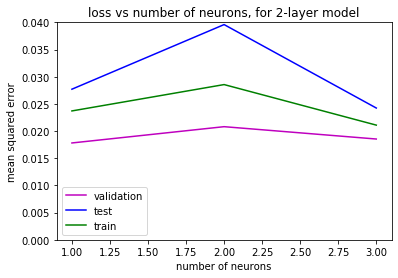

[0.017814210902142805, 0.02080942977569066, 0.018538984938059003]
[0.027704965611998675, 0.039591964971101595, 0.024241351227682985]
[0.023706871483041646, 0.028554681372867586, 0.02109600256953854]


In [50]:
draw_3_line ( 'loss vs number of neurons, for 2-layer model',
             'number of neurons','mean squared error', 0, 0.04, num_neurons_layer1 ,
                 valMSE_of_NumNeurons_2lay,   'm', 'validation', 
                 testMSE_of_NumNeurons_2lay,  'b', 'test', 
                 trainMSE_of_NumNeurons_2lay, 'g',  'train' )
print (valMSE_of_NumNeurons_2lay)
print (testMSE_of_NumNeurons_2lay)
print (trainMSE_of_NumNeurons_2lay)

## Three Layers


In [51]:

def train_3_layer_NN (train_input, train_output, val_input, val_output, 
                      learning_rate, regu_strength, num_neurons_layer1, num_neurons_layer2): 
    dim_InputData =5
    num_neurons_output=1
    
    model = Sequential()  
    model.add(Dense( num_neurons_layer1, 
                     input_shape=(dim_InputData,),
                     activation='sigmoid',
                     kernel_regularizer=regularizers.l1(regu_strength),  # regularizer l2 norm  defalt 0.01
                   ) )  
    model.add(Dense(num_neurons_layer2))
    model.add(Dense(num_neurons_output))

    model.compile(loss='mean_squared_error', optimizer=Adam(lr=learning_rate)  )

    es = EarlyStopping(monitor='val_loss', verbose=1)  # mode='min', 
    
    history=model.fit(train_input, train_output, 
                      validation_data=(val_input, val_output), #validation_split=0.1, 
                      nb_epoch=100, 
                      batch_size=1, 
                      verbose=1,
                      callbacks = [es]
                     )

    return model, history



 
def num_neurons_validation_3layers (how_many_iterations, train_in_noise2, train_out_noise2, val_in_noise2, val_out_noise2, test_in_noise2, test_out_noise2,
                            learning_rate, regu_strength, num_neurons_layer1, num_neurons_layer2_list):
    val_MSE_list= []
    test_MSE_list =[]
    train_MSE_list =[]
    time_3lay =[]
    
    for i in range (0, len (num_neurons_layer2_list) ):
        val= []
        test= []
        train = []
        tm= []
        
        for j in range (0, how_many_iterations): 
            start_time = time.time()
            
            model_lay3, model_history = train_3_layer_NN (train_in_noise2, train_out_noise2, val_in_noise2, val_out_noise2,  
                                                          learning_rate, 
                                                          regu_strength, 
                                                          num_neurons_layer1, 
                                                          num_neurons_layer2_list[i])
            end_time = time.time()
            time_spent= end_time - start_time
            tm.append (time_spent)
            
            val_MSE = model_history.history['val_loss'][-1]
            val.append (val_MSE)
            
            train_MSE = model_history.history['loss'][-1]
            train.append (train_MSE)  
        
            prediction = predict (model_lay3, test_in_noise2)
            test_MSE = mse (test_out_noise2, prediction) 
            test.append (test_MSE)
       
        val_MSE_list.append (mean (val))
        test_MSE_list.append (mean (test) )
        train_MSE_list.append (mean(train))
        time_3lay.append (mean (tm) )
        
    return val_MSE_list, test_MSE_list , train_MSE_list, time_3lay

learning_rate = 0.001
num_neurons_layer1 =3
num_neurons_layer2_list = [2] #[1,2,3,4,5,6,7,8]
regu_strength = 0.0001
how_many_iterations=10
valMSE_of_NumNeurons_3lay, testMSE_of_NumNeurons_3lay , trainMSE_of_NumNeurons_3lay, time_3lay =num_neurons_validation_3layers (how_many_iterations, train_in_noise2, train_out_noise2, val_in_noise2, val_out_noise2, test_in_noise2, test_out_noise2,
                                                learning_rate, regu_strength, num_neurons_layer1, num_neurons_layer2_list)



c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 961us/step - loss: 0.2465 - val_loss: 0.0710
Epoch 2/100
900/900 [==============================] - 1s 853us/step - loss: 0.0799 - val_loss: 0.0628
Epoch 3/100
900/900 [==============================] - 1s 871us/step - loss: 0.0682 - val_loss: 0.0511
Epoch 4/100
900/900 [==============================] - 1s 851us/step - loss: 0.0536 - val_loss: 0.0359
Epoch 5/100
900/900 [==============================] - 1s 825us/step - loss: 0.0390 - val_loss: 0.0272
Epoch 6/100
900/900 [==============================] - 1s 817us/step - loss: 0.0340 - val_loss: 0.0256
Epoch 7/100
900/900 [==============================] - 1s 819us/step - loss: 0.0332 - val_loss: 0.0252
Epoch 8/100
900/900 [==============================] - 1s 831us/step - loss: 0.0326 - val_loss: 0.0247
Epoch 9/100
900/900 [==============================] - 1s 834us/step - loss: 0.0324 - val_loss: 0.0247
Epoch 10/100
900/900 [=====

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 957us/step - loss: 0.5851 - val_loss: 0.0712
Epoch 2/100
900/900 [==============================] - 1s 880us/step - loss: 0.0827 - val_loss: 0.0736
Epoch 00002: early stopping


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 918us/step - loss: 0.0708 - val_loss: 0.0381
Epoch 2/100
900/900 [==============================] - 1s 807us/step - loss: 0.0485 - val_loss: 0.0300
Epoch 3/100
900/900 [==============================] - 1s 810us/step - loss: 0.0392 - val_loss: 0.0264
Epoch 4/100
900/900 [==============================] - 1s 812us/step - loss: 0.0351 - val_loss: 0.0253
Epoch 5/100
900/900 [==============================] - 1s 944us/step - loss: 0.0334 - val_loss: 0.0250
Epoch 6/100
900/900 [==============================] - 1s 946us/step - loss: 0.0326 - val_loss: 0.0250
Epoch 7/100
900/900 [==============================] - 1s 824us/step - loss: 0.0323 - val_loss: 0.0250
Epoch 8/100
900/900 [==============================] - 1s 814us/step - loss: 0.0319 - val_loss: 0.0246
Epoch 9/100
900/900 [==============================] - 1s 860us/step - loss: 0.0314 - val_loss: 0.0250
Epoch 00009: early stopping

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 931us/step - loss: 0.6382 - val_loss: 0.0659
Epoch 2/100
900/900 [==============================] - 1s 831us/step - loss: 0.0683 - val_loss: 0.0675
Epoch 00002: early stopping


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 903us/step - loss: 0.0962 - val_loss: 0.0704
Epoch 2/100
900/900 [==============================] - 1s 816us/step - loss: 0.0781 - val_loss: 0.0571
Epoch 3/100
900/900 [==============================] - 1s 960us/step - loss: 0.0635 - val_loss: 0.0483
Epoch 4/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0512 - val_loss: 0.0421
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0420 - val_loss: 0.0293
Epoch 6/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0367 - val_loss: 0.0286
Epoch 7/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0350 - val_loss: 0.0263
Epoch 8/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0341 - val_loss: 0.0260
Epoch 9/100
900/900 [==============================] - 1s 819us/step - loss: 0.0332 - val_loss: 0.0259
Epoch 10/100
900/900 [===============

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1533 - val_loss: 0.0738
Epoch 2/100
900/900 [==============================] - 1s 833us/step - loss: 0.0717 - val_loss: 0.0518
Epoch 3/100
900/900 [==============================] - 1s 858us/step - loss: 0.0593 - val_loss: 0.0427
Epoch 4/100
900/900 [==============================] - 1s 849us/step - loss: 0.0499 - val_loss: 0.0394
Epoch 5/100
900/900 [==============================] - 1s 889us/step - loss: 0.0441 - val_loss: 0.0333
Epoch 6/100
900/900 [==============================] - 1s 893us/step - loss: 0.0406 - val_loss: 0.0300
Epoch 7/100
900/900 [==============================] - 1s 944us/step - loss: 0.0381 - val_loss: 0.0292
Epoch 8/100
900/900 [==============================] - 1s 903us/step - loss: 0.0360 - val_loss: 0.0277
Epoch 9/100
900/900 [==============================] - 1s 908us/step - loss: 0.0350 - val_loss: 0.0282
Epoch 00009: early stopping


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 942us/step - loss: 0.0806 - val_loss: 0.0566
Epoch 2/100
900/900 [==============================] - 1s 810us/step - loss: 0.0608 - val_loss: 0.0457
Epoch 3/100
900/900 [==============================] - 1s 870us/step - loss: 0.0521 - val_loss: 0.0354
Epoch 4/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0449 - val_loss: 0.0327
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0402 - val_loss: 0.0287
Epoch 6/100
900/900 [==============================] - 1s 813us/step - loss: 0.0374 - val_loss: 0.0267
Epoch 7/100
900/900 [==============================] - 1s 962us/step - loss: 0.0361 - val_loss: 0.0263
Epoch 8/100
900/900 [==============================] - 1s 894us/step - loss: 0.0348 - val_loss: 0.0260
Epoch 9/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0337 - val_loss: 0.0257
Epoch 10/100
900/900 [===========

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1015 - val_loss: 0.0703
Epoch 2/100
900/900 [==============================] - 1s 911us/step - loss: 0.0630 - val_loss: 0.0406
Epoch 3/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0423 - val_loss: 0.0305
Epoch 4/100
900/900 [==============================] - 1s 816us/step - loss: 0.0375 - val_loss: 0.0289
Epoch 5/100
900/900 [==============================] - 1s 967us/step - loss: 0.0362 - val_loss: 0.0281
Epoch 6/100
900/900 [==============================] - 1s 933us/step - loss: 0.0355 - val_loss: 0.0274
Epoch 7/100
900/900 [==============================] - 1s 922us/step - loss: 0.0344 - val_loss: 0.0269
Epoch 8/100
900/900 [==============================] - 1s 833us/step - loss: 0.0343 - val_loss: 0.0269
Epoch 00008: early stopping


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 1ms/step - loss: 0.2525 - val_loss: 0.0810
Epoch 2/100
900/900 [==============================] - 1s 861us/step - loss: 0.0857 - val_loss: 0.0711
Epoch 3/100
900/900 [==============================] - 1s 967us/step - loss: 0.0735 - val_loss: 0.0593
Epoch 4/100
900/900 [==============================] - 1s 902us/step - loss: 0.0606 - val_loss: 0.0445
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0473 - val_loss: 0.0325
Epoch 6/100
900/900 [==============================] - 1s 867us/step - loss: 0.0378 - val_loss: 0.0293
Epoch 7/100
900/900 [==============================] - 1s 923us/step - loss: 0.0337 - val_loss: 0.0250
Epoch 8/100
900/900 [==============================] - 1s 875us/step - loss: 0.0328 - val_loss: 0.0244
Epoch 9/100
900/900 [==============================] - 1s 899us/step - loss: 0.0312 - val_loss: 0.0252
Epoch 00009: early stopping


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 1ms/step - loss: 0.4637 - val_loss: 0.0848
Epoch 2/100
900/900 [==============================] - 1s 854us/step - loss: 0.0920 - val_loss: 0.0753
Epoch 3/100
900/900 [==============================] - 1s 893us/step - loss: 0.0868 - val_loss: 0.0714
Epoch 4/100
900/900 [==============================] - 1s 940us/step - loss: 0.0817 - val_loss: 0.0681
Epoch 5/100
900/900 [==============================] - 1s 922us/step - loss: 0.0748 - val_loss: 0.0580
Epoch 6/100
900/900 [==============================] - 1s 915us/step - loss: 0.0653 - val_loss: 0.0491
Epoch 7/100
900/900 [==============================] - 1s 914us/step - loss: 0.0537 - val_loss: 0.0391
Epoch 8/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0449 - val_loss: 0.0335
Epoch 9/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0402 - val_loss: 0.0306
Epoch 10/100
900/900 [===========

In [52]:
print (valMSE_of_NumNeurons_3lay, testMSE_of_NumNeurons_3lay , trainMSE_of_NumNeurons_3lay, time_3lay)

[0.03523068297951249] [0.044616743832166995] [0.0414218210987294] [8.017285227775574]


(1, 1000)
(1, 1000)
(1, 1, 1000)
(1, 1, 1000)
(1, 1, 200)
(1, 1, 200)


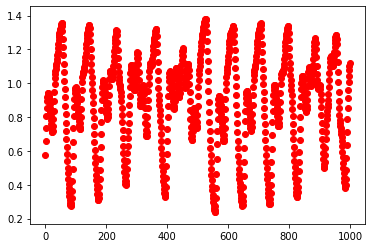

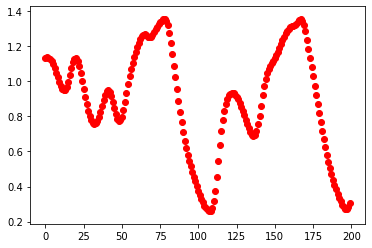